In [1]:
!pip uninstall tensorflow
!pip uninstall keras 

Uninstalling tensorflow-1.4.0:
  Would remove:
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/external/*
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.4.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.4.0
Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3


In [2]:
pip install tensorflow==1.4.0

  Using cached https://files.pythonhosted.org/packages/86/9f/be0165c6eefd841e6928e54d3d083fa174f92d640fdc52f73a33dc9c54d1/tensorflow-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: fancyimpute 0.4.3 requires keras>=2.0.0, which is not installed.


In [3]:
pip install keras

  Using cached https://files.pythonhosted.org/packages/44/e1/dc0757b20b56c980b5553c1b5c4c32d378c7055ab7bfa92006801ad359ab/Keras-2.4.3-py2.py3-none-any.whl


In [4]:
from google.colab import files
src = list(files.upload().values())[0]
open('Agent.py','wb').write(src)
import Agent

Saving Agent.py to Agent (1).py


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [5]:
from google.colab import files
src = list(files.upload().values())[0]
open('AgentOthers.py','wb').write(src)
import AgentOthers

Saving AgentOthers.py to AgentOthers (1).py


In [1]:
from google.colab import files
src = list(files.upload().values())[0]
open('MyEnv1.py','wb').write(src)
import MyEnv1

Saving MyEnv1.py to MyEnv1 (5).py


Streaming output truncated to the last 5000 lines.
  1598.1338 1629.454  1642.2059]]   best_action: 9
  best_action: 9
Energy: [0.08625000000000001, 0.0575, -5.769133919519034, -8.695652173913043, 0.663450400744689]
step: 11078   DQN_state: [1.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.5919715] q-values: [[1534.1722 1572.0697 1589.4208 1596.4524 1602.4027 1613.798  1630.3441
  1598.2695 1630.0739 1642.4055]]   best_action: 9
  best_action: 9
Energy: [0.0825, 0.055, -5.881559069210405, -9.09090909090909, 0.6469714976131445]
step: 11079   DQN_state: [1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.63636067] q-values: [[1535.5225 1572.2    1590.0189 1597.0225 1603.3196 1614.1653 1631.1398
  1598.9691 1631.4526 1642.8185]]   best_action: 9
  best_action: 9
Energy: [0.0825, 0.055, -6.2850969670301895, -9.090909090909092, 0.6913606663733208]
step: 11080   DQN_state: [0.         0.     

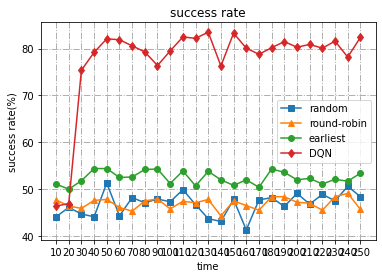

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from MyEnv1 import SchedulingEnvironment
from Agent import DQN
from AgentOthers import baselines


performance_lamda = []
EPISODE = 1
policyNum = 4
policyName = ['random', 'round-robin', 'earliest', 'DQN']
start_learn = 500  # DQN parameter
learn_interval = 1   # DQN parameter
global_step = 0  # DQN parameter
environment = SchedulingEnvironment()
brainRL = DQN(environment.actionNum, environment.s_features)
brainOthers = baselines(environment.actionNum, environment.VMtypes)

t_start = time.time()


for episode in range(EPISODE):
    print('----------------------------Episode', episode, '----------------------------')
    job_c = 1  # job counter
    performance_c = 0
    performance_c_time = 1  # counter for getting performance according to time
    performance_showT = 10
    environment.reset()  
    performance_respTs = []
    performance_successes = []

    while True:
        global_step += 1
        finish, job_attrs = environment.workload(job_c)  # job_attrs = [id, arrival_time, length, type, ddl]
        # DQN policy
        DQN_state = environment.getState(job_attrs, 4)  # job type, VM wait time
        print('step:', global_step, '  DQN_state:', DQN_state, end='')
        if global_step != 1:  # store transition
            brainRL.store_transition(last_state, last_action, last_reward, DQN_state)
        action_DQN = brainRL.choose_action(DQN_state)  # choose action
        Energy, reward_DQN = environment.feedback(job_attrs, action_DQN, 4)
        
        if (global_step > start_learn) and (global_step % learn_interval == 0):  # learn
            brainRL.learn()
        print('Energy:', Energy)
        last_state = DQN_state
        last_action = action_DQN
        last_reward = reward_DQN

        # random policy
        action_random = brainOthers.random_choose_action()
        reward_random = environment.feedback(job_attrs, action_random, 1)
        # round robin policy
        action_RR = brainOthers.RR_choose_action(job_c)
        reward_RR = environment.feedback(job_attrs, action_RR, 2)
        # earliest policy
        idleTimes = environment.get_VM_idleT(3)  # get VM state
        action_early = brainOthers.early_choose_action(idleTimes)
        reward_early = environment.feedback(job_attrs, action_early, 3)
        
        # choice 1: get performance according to time
        if job_attrs[1] >= performance_c_time * performance_showT:
            avg_respTs = environment.get_responseTs(policyNum, performance_c, job_c-1)
            performance_respTs.append(avg_respTs)
            successTs = environment.get_successTimes(policyNum, performance_c, job_c-1)
            performance_successes.append(successTs)
            performance_c = job_c - 1
            performance_c_time += 1
        if finish:
            avg_respTs = environment.get_responseTs(policyNum, performance_c, job_c)
            performance_respTs.append(avg_respTs)
            successTs = environment.get_successTimes(policyNum, performance_c, job_c)
            performance_successes.append(successTs)


        job_c += 1
        if finish:
            break

    # episode performance
    startP = 2000
    total_Rewards = environment.get_totalRewards(policyNum, startP)
    avg_allRespTs = environment.get_total_responseTs(policyNum, startP)
    total_success = environment.get_totalSuccess(policyNum, startP)
    avg_util = environment.get_avgUtilitizationRate(policyNum, startP)
    total_Ts = environment.get_totalTimes(policyNum, startP)
    # JobDistribution = environment.get_JobDistribution(policyNum)

    print('total performance (after 1000 jobs):')
    print('[random policy] reward:', total_Rewards[0],
          'success_rate:', total_success[0], ' utilizationRate:', avg_util[0], ' finishT:', total_Ts[0])
    print('[RR policy] reward:', total_Rewards[1],
          'success_rate:', total_success[1], ' utilizationRate:', avg_util[1], ' finishT:', total_Ts[1])
    print('[earliest policy] reward:', total_Rewards[2],
          'success_rate:', total_success[2], ' utilizationRate:', avg_util[2], ' finishT:', total_Ts[2])
    print('[DQN policy] reward:', total_Rewards[3],
          'success_rate:', total_success[3], ' utilizationRate:', avg_util[3], ' finishT:', total_Ts[3])
    
    # episode performance
    startP = 5000
    total_Rewards = environment.get_totalRewards(policyNum, startP)
    avg_allRespTs = environment.get_total_responseTs(policyNum, startP)
    total_success = environment.get_totalSuccess(policyNum, startP)
    avg_util = environment.get_avgUtilitizationRate(policyNum, startP)
    total_Ts = environment.get_totalTimes(policyNum, startP)
    # JobDistribution = environment.get_JobDistribution(policyNum)

    print('total performance (after 5000 jobs):')
    print('[random policy] reward:', total_Rewards[0],
          'success_rate:', total_success[0], ' utilizationRate:', avg_util[0], ' finishT:', total_Ts[0])
    print('[RR policy] reward:', total_Rewards[1],
          'success_rate:', total_success[1], ' utilizationRate:', avg_util[1], ' finishT:', total_Ts[1])
    print('[earliest policy] reward:', total_Rewards[2],
          'success_rate:', total_success[2], ' utilizationRate:', avg_util[2], ' finishT:', total_Ts[2])
    print('[DQN policy] reward:', total_Rewards[3],
          'success_rate:', total_success[3], ' utilizationRate:', avg_util[3], ' finishT:', total_Ts[3])

    # episode performance
    startP = 10000
    total_Rewards = environment.get_totalRewards(policyNum, startP)
    avg_allRespTs = environment.get_total_responseTs(policyNum, startP)
    total_success = environment.get_totalSuccess(policyNum, startP)
    avg_util = environment.get_avgUtilitizationRate(policyNum, startP)
    total_Ts = environment.get_totalTimes(policyNum, startP)
    # JobDistribution = environment.get_JobDistribution(policyNum)

    print('total performance (after 10000 jobs):')
    print('[random policy] reward:', total_Rewards[0],
          'success_rate:', total_success[0], ' utilizationRate:', avg_util[0], ' finishT:', total_Ts[0])
    print('[RR policy] reward:', total_Rewards[1],
          'success_rate:', total_success[1], ' utilizationRate:', avg_util[1], ' finishT:', total_Ts[1])
    print('[earliest policy] reward:', total_Rewards[2],
          'success_rate:', total_success[2], ' utilizationRate:', avg_util[2], ' finishT:', total_Ts[2])
    print('[DQN policy] reward:', total_Rewards[3],
          'success_rate:', total_success[3], ' utilizationRate:', avg_util[3], ' finishT:', total_Ts[3])
            
    
t_end = time.time()
timer = round(t_end - t_start, 2)
print('\n', 'timer:', timer, 's')


# pic 1: the successRate in one episode (line pic)
draw_success = np.array(performance_successes) * 100
draw_success = np.around(draw_success, 1)
x = range(draw_success.shape[0])
lables =['s-', '^-', 'o-', 'd-', '*-', 'p-']
plt.figure()
for i in range(policyNum):
    y = draw_success[:, i]
    pn = policyName[i]
    la = lables[i]
    plt.plot(x, y, la, label=pn)

plt.xlabel('time')
plt.ylabel('success rate(%)')
plt.legend(loc='best')  # add legend

# x sticks
x_sticks = np.linspace(0, draw_success.shape[0] - 1, draw_success.shape[0])

x_sticks_names = np.linspace(1*performance_showT, draw_success.shape[0]*performance_showT, draw_success.shape[0])
x_sticks_names = x_sticks_names.astype(int)
plt.xticks(x_sticks, x_sticks_names)

plt.grid(True, linestyle="-.", linewidth=1)
plt.title('success rate')
plt.show()

